# FM CW LAYDAR

In [169]:
%matplotlib inline

import math as m
import numpy as np
import matplotlib.pyplot as plt

## 変数定義

c: 光速[m/s]

v0: 自物の速度[m/s]

v1: 目標物の速度[m/s]

r: 相対距離[m]

dt: 時間分解能

fout_avg: 出力周波数[Hz]

fout_max: 最高出力周波数[Hz]

fout_min: 最低出力周波数[Hz]

dfdt: 時間毎の出力周波数変化幅[Hz]

t: 時間


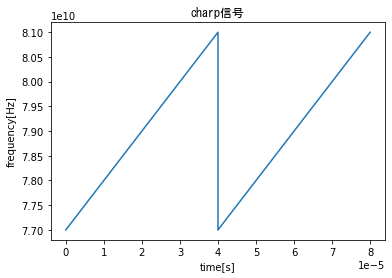

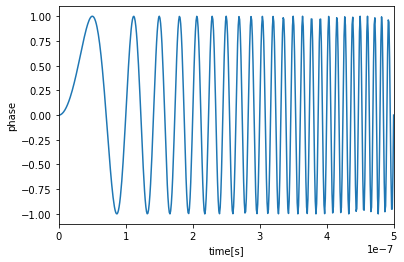

In [170]:
c = 2.99792458 * 10**8

v0 = 0
v1 = 0 
r = c * 10**(-6)

bw = 4 * 10**9
fout_min = 77 * 10**9
fout_max = fout_min + bw

tc = 40 * 10**(-6)
dt = 1 * 10 **(-9)

#charp信号の生成
t_tmp = np.arange(0, tc, dt)
f_tmp = bw * t_tmp / tc + fout_min
fout = []
t = []
tt = 0.0
for i in range(len(f_tmp)):
    fout.append(f_tmp[i])
    t.append(tt)
    tt = tt + dt

for i in range(len(f_tmp)):
    fout.append(f_tmp[i])
    t.append(tt)
    tt = tt + dt
fout = np.array(fout)
t = np.array(t)

plt.title('charp信号', fontname="MS Gothic")
plt.xlabel("time[s]")
plt.ylabel("frequency[Hz]")
plt.plot(t, fout)
plt.show()

y = np.sin(2*np.pi*fout*t)
plt.plot(t, y)
plt.xlim([0,5*10**(-7)])
plt.xlabel("time[s]")
plt.ylabel("phase")
plt.show()

tau = 2e-06 [s]


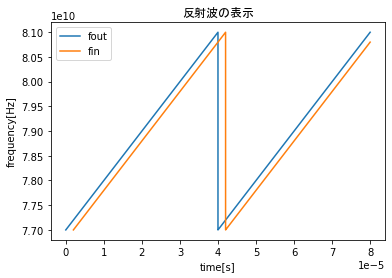

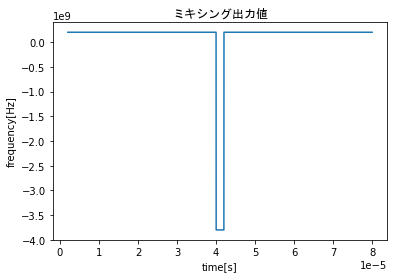

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

In [176]:
tau = 2 * r / c
print('tau = ' + str(tau) + ' [s]')
#反射波がfout配列の何要素分遅れるか
delay = len(t) - np.count_nonzero(t>tau)

fin = []
for i in range(delay):
    fin.append(None)

j = 0
for i in range(len(t)- delay):
    fin.append(fout[j])
    j = j + 1
fin = np.array(fin)

plt.title('反射波の表示', fontname="MS Gothic")
plt.xlabel("time[s]")
plt.ylabel("frequency[Hz]")
plt.plot(t, fout, label="fout")
#plt.plot(t, fout2, label="fout2")
plt.plot(t, fin, label="fin")
#plt.ylim([fout_min, fout_max])
plt.legend()
plt.show()

fdiff = []

for i in range(len(fout)):
    if fout[i] is None or fin[i] is None:
        fdiff.append(None)
    else:
        fdiff.append(fout[i] - fin[i])
fdiff = np.array(fdiff)

plt.title('ミキシング出力値', fontname="MS Gothic")
plt.xlabel("time[s]")
plt.ylabel("frequency[Hz]")
plt.plot(t, fdiff)
plt.show()
print('最大値： ' + str(max(fdiff)) + ' Hz')

In [ ]:
fout = []
ff = fout_avg
code = 1
for tt in t:
    fout.append(ff)
    ff = ff + code * dfdt
    if ff >= fout_max:
        code = -1
    elif ff <= fout_min:
        code = 1
fout = np.array(fout)

dt = 2 * r / c

fout2 = []
ff = fout_avg - dfdt * dt
code = 1
for tt in t:
    fout2.append(ff)
    ff = ff + code * dfdt
    if ff >= fout_max:
        code = -1
    elif ff <= fout_min:
        code = 1
fout2 = np.array(fout2)
#fin = fout2 * (c - v0) / (c - v1)
fin = fout2

plt.xlabel("time[s]")
plt.ylabel("frequency[Hz]")
plt.plot(t, fout, label="fout")
#plt.plot(t, fout2, label="fout2")
plt.plot(t, fin, label="fin")

plt.legend()
plt.show()

In [ ]:

t = np.arange(0, 10**(-4), 10**(-9))
f = t * 10**9
y = np.sin(2*np.pi*f*t)
plt.plot(t, y)
plt.show()

In [ ]:
q = 100*1000/60/60
print(q)